<a href="https://colab.research.google.com/github/RomanGustavo/Mestrado---ML/blob/main/codigo_aula6_regressao_linear_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear Múltipla

## Objetivo
Com este código, você irá:
- Estender o nosso modelo de regressão para que ele possa contemplar múltiplas características
    - Vamos estender a estrutura dos dados para contemplar múltiplas características
    - Reescrever a previsão, a função custo e o cálculo do gradiente para contemplar a possibilidade de múltiplas características
    - Utilizar a função `np.dot` para vetorizar nossa implementação, para simplificar o código e torná-lo mais rápido.

In [17]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduz a precisão das numpy arrays na hora de dar print

# Definição do Problema

Usaremos um exemplo de motivação baseado no problema de estimar o preço de uma casa.

Os dados de treinamento contêm três exemplos com quatro características (Área, quartos, andares e idade).  Note que a primeira característica possui uma ordem de grandeza muito maior que as demais. Isso causará um problema, mas nós resolveremos isso em códigos futuros.


| Área (sqft) | quartos  | andares | Idade | preço (milháres de dólares)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

Você irá construir um modelo de regressão linear usando esses valores de tal forma que você também possa depois estimar o preço de outras casas. Por exemplo, um casa com 1200 sqft, 3 quartos, 1 andares, 40 anos.  


In [18]:
X_trein = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_trein = np.array([460, 232, 178])

## Dando print na nossa matriz X, que contém nossos exemplos de treinamento

In [19]:
print(f"X Shape: {X_trein.shape}, X Type:{type(X_trein)})")
print(X_trein)
print(f"y Shape: {y_trein.shape}, y Type:{type(y_trein)})")
print(y_trein)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


## Parâmetros $w$ e $b$

* $\mathbf{w}$ é um vetor com $n$ elementos.
  - Cada elemento contém um parâmetro associado a uma característica
  - Para o nosso conjunto de dados, $n$ é 4 (número de características)
  - $b$ é um parâmetro escalar (apenas um único número)


Para demonstração, $\mathbf{w}$ e $b$ serão carregados com um valor inicial que é próximo do ótimo. $\mathbf{w}$ é um vetor construído como sendo uma numpy array de 1 dimensão (1-D NumPy array).

In [20]:
b_inicial = 785.1811367994083
w_inicial = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_inicial shape: {w_inicial.shape}, b_inicial type: {type(b_inicial)}")

w_inicial shape: (4,), b_inicial type: <class 'float'>


# Previsão usando o Modelo com múltiplas características

A previsão do modelo com múltiplas características é dada pelo seguinte modelo linear:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$

ou, usando uma notação vetorial:

$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$

onde $\cdot$ é o produtor escalar (`dot product`)

Para demonstrar o produto escalar, iremos implementar a previsão usando (1) e (2).


## Usando (1) e um loop for


In [21]:
def previsao_usando_loop_for(x, w, b):
    """
    faz uma previsão usando loop for

    Args:
      x (ndarray): Shape (n,) -> exemplo contendo múltiplas características
      w (ndarray): Shape (n,) -> parâmetros w do modelo
      b (scalar):  parâmetro b do modelo

    retorna:
      p (scalar):  previsão
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [22]:
# pegando uma linha do nosso conjunto de dados
x_vetor = X_trein[0,:]
print(f"x_vetor shape {x_vetor.shape}, x_vec: {x_vetor}")

# fazendo previsão para essa casa
f_wb = previsao_usando_loop_for(x_vetor, w_inicial, b_inicial)
print(f"f_wb shape {f_wb.shape}, previsão: {f_wb}")

x_vetor shape (4,), x_vec: [2104    5    1   45]
f_wb shape (), previsão: 459.9999976194083


Note que o shape do `x_vetor` é 1-D com 4 elementos, ou seja, (4,). Já o resultado da previsão, `f_wb`, é um escalar.


## Usando (2) e o produto escalar para termos uma versão vetorizada

In [23]:
def previsao(x, w, b):
    """
    Argumentos da função:
      x (ndarray): Shape (n,) -> exemplo contendo múltiplas características
      w (ndarray): Shape (n,) -> parâmetros w do modelo
      b (escalar):  parâmetro b do modelo

    retorna:
      p (escalar):  previsão
    """
    p = np.dot(x, w) + b
    return p

In [24]:
# pegando uma linha do nosso conjunto de dados
x_vetor = X_trein[0,:]
print(f"x_vetor shape {x_vetor.shape}, x_vec: {x_vetor}")

# fazendo previsão para essa casa
f_wb = previsao(x_vetor, w_inicial, b_inicial)
print(f"f_wb shape {f_wb.shape}, previsão: {f_wb}")

x_vetor shape (4,), x_vec: [2104    5    1   45]
f_wb shape (), previsão: 459.9999976194083


Note que o resultado é igual ao obtido anteriormente, pois trata-se da mesma casa e do mesmo modelo de previsão. Entretanto, a implementação vetorizada (com redução de laços do tipo `for') é mais elegante e menos custosa computacionalmente.

# Calculando o custo quando o modelo possui múltiplas características
A função custo $J(\mathbf{w},b)$ quando temos múltiplas características é dada por:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
onde:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


Diferentemente dos nossos códigos anteriores, agora $\mathbf{w}$ e $\mathbf{x}^{(i)}$ são vetores ao invés de escalares.

Abaixo encontram-se uma implementação das equações (3) and (4).

In [25]:
def calcula_custo(X, y, w, b):
    """
    Calcula o custo
    Argumentos da função:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (escalar)       : parâmetro b do modelo

    Retorna:
      custo (escalar): custo
    """
    m     = X.shape[0]
    custo = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = escalar (see np.dot)
        custo = custo + (f_wb_i - y[i])**2     # escalar
    custo = custo / (2 * m)                    # escalar
    return custo

In [26]:
# Calcula e mostra o custo usando os nossos parâmetros ótimos escolhidos previamente
custo = calcula_custo(X_trein, y_trein, w_inicial, b_inicial)
print(f'Custo com parâmetros ótimos: {custo}')

Custo com parâmetros ótimos: 1.5578904428966628e-12


**Resultado esperado**: 1.5578904045996674e-12

# Método do Gradiente com Múltiplas Variáveis

Método do Gradiente com Múltiplas Variáveis:

$$\begin{align*} \text{repetir}&\text{ até convergir:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{para j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

onde, n é o número de características, parâmetros $w_j$ e $b$ são atualizados simultaneamente e onde  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m é o número de amostras de treinamento no nosso conjunto de dados

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ é a previsão feita pelo modelo, enquanto que $y^{(i)}$ é o valor alvo


## Calculando o gradiente

Abaixo encontra-se uma implementação para calcular as equações (6) e (7). Existe muitas formas para se implementar isso. Certifique-se que você compreendeu a implementação.
   

In [27]:
def calcula_gradiente(X, y, w, b):
    """
    Calcula Gradiente para Regressão Linear
    Argumentos:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (escalar)      : parâmetro b do modelo

    Retorna:
      dj_dw (ndarray (n,)): O gradiente da função custo com relação aos parâmetros w.
      dj_db (escalar):      O gradiente da função custo com relação ao parâmetro b.
    """
    m,n = X.shape           #(número de exemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        erro = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + erro * X[i, j]
        dj_db = dj_db + erro
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [28]:
# Calcula e mostra o gradiente
tmp_dj_db, tmp_dj_dw = calcula_gradiente(X_trein, y_trein, w_inicial, b_inicial)
print(f'dj_db com valores iniciais para w,b: {tmp_dj_db}')
print(f'dj_dw com valores iniciais para w,b: \n {tmp_dj_dw}')

dj_db com valores iniciais para w,b: -1.6739251501955248e-06
dj_dw com valores iniciais para w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


**Resultados Esperados**:   
dj_db com valores iniciais w,b: -1.6739251122999121e-06  
dj_dw com valores iniciais w,b:   
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]  

## Método do Gradiente com múltiplas características

A rotina a seguir implementa a equação (5)

In [29]:
def metodo_do_gradiente(X, y, w_in, b_in, calcula_custo, calcula_gradiente, alpha, num_iters):
    """
    Performa Método do Gradiente para aprender w e b. Atualiza w e b ao longo de
    num_iters iterações usando uma taxa de aprendizado alpha

    Argumentos da função:
      X (ndarray (m,n))   : Dados, contendo m exemplos com n características
      y (ndarray (m,))    : valores alvo
      w_in (ndarray (n,)) : valores iniciais dos parâmetros w do modelo
      b_in (escalar)      : valor inicial do parâmetro b do modelo
      calcula_custo       : função que calcula o custo
      calcula_gradiente   : função que calcula o gradiente
      alpha (float)       : taxa de aprendizado
      num_iters (int)     : Número de iterações para o método do gradiente

    Retorna:
      w (ndarray (n,)) : Valores atualizados para os parâmetros w
      b (scalar)       : Valores atualizado para o parâmetro b
      """

    # Valores históricos
    J_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):

        # Calcula o gradiente
        dj_db,dj_dw = calcula_gradiente(X, y, w, b)

        # Atualiza os parâmetros
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Salva o custo
        if i<100000:      # prevent resource exhaustion
            J_history.append( calcula_custo(X, y, w, b))

        # Faz print de tempos em tempos
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteração {i:4d}: Custo {J_history[-1]:8.2f}   ")

    return w, b, J_history # retorna valores finais e históricos

Na célula a seguir testamos a implementação

In [32]:
# inicializando parâmetros
# w_inicial = np.zeros_like(w_inicial) -- antigo
# b_inicial = 0 -- antigo
w_inicial = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b_inicial = 785.1811367994083
# parâmetros para rodar o Método do Gradiente:
num_iters = 1000
alpha     = 5.0e-7
# Rodando o Método do gradiente
w_final, b_final, J_hist = metodo_do_gradiente(X_trein, y_trein, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")
m,_ = X_trein.shape
for i in range(m):
    print(f"previsão: {np.dot(X_trein[i], w_final) + b_final:0.2f}, valor alvo: {y_trein[i]}")

Iteração    0: Custo     0.00   
Iteração  100: Custo     0.00   
Iteração  200: Custo     0.00   
Iteração  300: Custo     0.00   
Iteração  400: Custo     0.00   
Iteração  500: Custo     0.00   
Iteração  600: Custo     0.00   
Iteração  700: Custo     0.00   
Iteração  800: Custo     0.00   
Iteração  900: Custo     0.00   
b,w encontrados pelo método do gradiente: 785.18,[  0.39  18.75 -53.36 -26.42] 
previsão: 460.00, valor alvo: 460
previsão: 232.00, valor alvo: 232
previsão: 178.00, valor alvo: 178


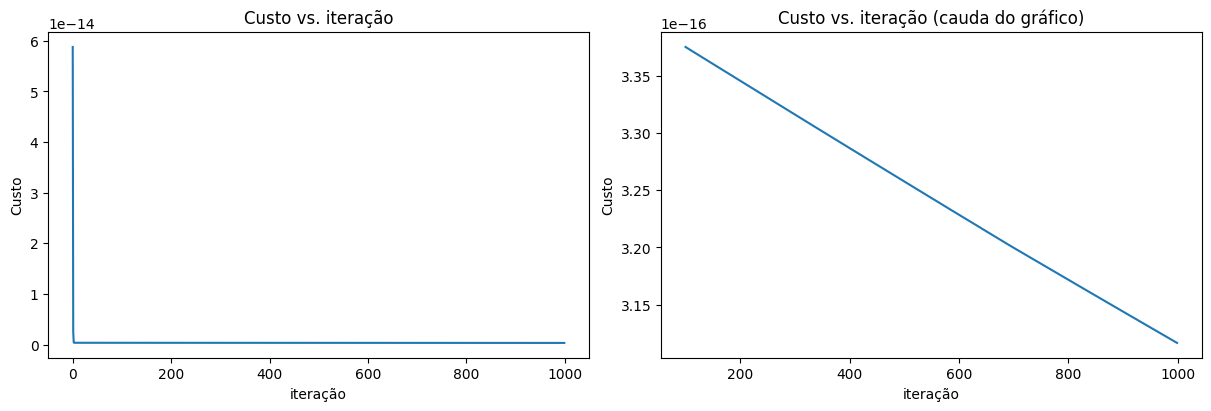

In [33]:
# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Custo vs. iteração");  ax2.set_title("Custo vs. iteração (cauda do gráfico)")
ax1.set_ylabel('Custo')             ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')   ;  ax2.set_xlabel('iteração')
plt.show()

*Estes resultados ainda não são os melhores*! O custo ainda está caindo e nossas previsões não estão tão precisas. No próximo código nós vamos descobrir como melhorar isso.

Respostas:
* Os valores para b e w foram: -0.00,[ 0.2   0.   -0.01 -0.07]
* Eles não são os melhores valores pois não se aproximam muito bem dos valores alvos, por conta da unidade de medida de metragem da casa.
* Podemos aumentar o alpha para aumentar a velocidade com que w e b mudam, e também podemos alterar a unidade de medida da área para tentar obter um resultado diferente.
* Rodando novamente o código, agora utilizando os valores próximos ao ideal encontrei como b e w os seguintes valores: 785.18,[  0.39  18.75 -53.36 -26.42]

# Parabéns!
Com este código você:
- Redesenvolveu as rotinas para Regressão Linear, agora com múltiplas variáveis.
- Utilizou NumPy `np.dot` para vetorizar as implementações